# Tutorial - VAE pretraining with a traditional metric loss; triplet loss

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from vae_triplet import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "qed"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_6-1_{PROPERTY_NAME.upper()}_pretraining_m10"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [8]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [9]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [10]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of MTMR

In [11]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [12]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             margin=10.,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 101.740  loss_recon_src(tr): 3.428  loss_recon_tar(tr): 3.423  loss_recon_neg(tr): 3.420  loss_kld(tr): 1.709  loss_triplet(tr): 9.832  valid_ratio(va): 0.133  similarity(va): 0.004
[00001000/00100000]  loss(tr): 76.898  loss_recon_src(tr): 0.639  loss_recon_tar(tr): 0.538  loss_recon_neg(tr): 0.597  loss_kld(tr): 15.231  loss_triplet(tr): 6.137
[00002000/00100000]  loss(tr): 81.891  loss_recon_src(tr): 0.587  loss_recon_tar(tr): 0.481  loss_recon_neg(tr): 0.513  loss_kld(tr): 15.607  loss_triplet(tr): 6.602
[00003000/00100000]  loss(tr): 72.122  loss_recon_src(tr): 0.544  loss_recon_tar(tr): 0.456  loss_recon_neg(tr): 0.517  loss_kld(tr): 15.724  loss_triplet(tr): 5.614
[00004000/00100000]  loss(tr): 67.278  loss_recon_src(tr): 0.517  loss_recon_tar(tr): 0.437  loss_recon_neg(tr): 0.460  loss_kld(tr): 17.356  loss_triplet(tr): 4.969
[00005000/00100000]  loss(tr): 71.646  loss_recon_src(tr): 0.493  loss_recon_tar(tr): 0.416  loss_recon_neg(tr): 0.462  los

[00048000/00100000]  loss(tr): 56.879  loss_recon_src(tr): 0.441  loss_recon_tar(tr): 0.299  loss_recon_neg(tr): 0.375  loss_kld(tr): 18.813  loss_triplet(tr): 3.788
[00049000/00100000]  loss(tr): 57.845  loss_recon_src(tr): 0.450  loss_recon_tar(tr): 0.329  loss_recon_neg(tr): 0.365  loss_kld(tr): 19.321  loss_triplet(tr): 3.833
[00050000/00100000]  loss(tr): 53.246  loss_recon_src(tr): 0.433  loss_recon_tar(tr): 0.313  loss_recon_neg(tr): 0.351  loss_kld(tr): 19.218  loss_triplet(tr): 3.385  valid_ratio(va): 1.000  similarity(va): 0.149
[00051000/00100000]  loss(tr): 57.603  loss_recon_src(tr): 0.426  loss_recon_tar(tr): 0.313  loss_recon_neg(tr): 0.396  loss_kld(tr): 19.948  loss_triplet(tr): 3.747
[00052000/00100000]  loss(tr): 57.202  loss_recon_src(tr): 0.453  loss_recon_tar(tr): 0.308  loss_recon_neg(tr): 0.363  loss_kld(tr): 19.309  loss_triplet(tr): 3.771
[00053000/00100000]  loss(tr): 59.378  loss_recon_src(tr): 0.433  loss_recon_tar(tr): 0.307  loss_recon_neg(tr): 0.372  los

[00096000/00100000]  loss(tr): 60.759  loss_recon_src(tr): 0.418  loss_recon_tar(tr): 0.309  loss_recon_neg(tr): 0.344  loss_kld(tr): 19.632  loss_triplet(tr): 4.095
[00097000/00100000]  loss(tr): 66.061  loss_recon_src(tr): 0.410  loss_recon_tar(tr): 0.289  loss_recon_neg(tr): 0.370  loss_kld(tr): 18.971  loss_triplet(tr): 4.691
[00098000/00100000]  loss(tr): 65.888  loss_recon_src(tr): 0.405  loss_recon_tar(tr): 0.263  loss_recon_neg(tr): 0.343  loss_kld(tr): 19.510  loss_triplet(tr): 4.621
[00099000/00100000]  loss(tr): 61.702  loss_recon_src(tr): 0.417  loss_recon_tar(tr): 0.288  loss_recon_neg(tr): 0.389  loss_kld(tr): 19.607  loss_triplet(tr): 4.191
[00100000/00100000]  loss(tr): 55.487  loss_recon_src(tr): 0.422  loss_recon_tar(tr): 0.273  loss_recon_neg(tr): 0.341  loss_kld(tr): 19.432  loss_triplet(tr): 3.588  valid_ratio(va): 1.000  similarity(va): 0.151


## 9. Visualize for loss analysis

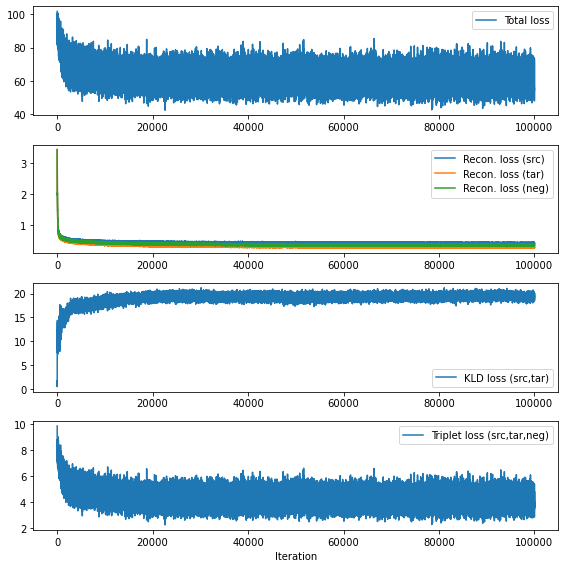

In [13]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_KL_DIVERGENCE"], label="KLD loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_TRIPLET"], label="Triplet loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

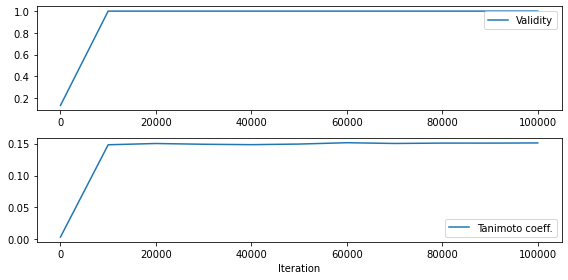

In [14]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()